In [1]:
from abel import SourceBasic, InterstageImpactX, InterstageQuadsImpactX, Linac
from abel.utilities.plasma_physics import beta_matched
import numpy as np

/users/lindstrm/.abelconfig.toml
Loading ABEL config from '/users/lindstrm/.abelconfig.toml'
CONFIG.bind_path = "/pfs/lustrep4/scratch/project_465001375"
CONFIG.cluster_name = "lumi"
CONFIG.default_cmap = <matplotlib.colors.ListedColormap object at 0x7fc31b765a50>
CONFIG.elegant_exec = "singularity exec --bind /pfs/lustrep4/scratch/project_465001375:/pfs/lustrep4/scratch/project_465001375 /project/project_465001375/software/elegantelegant.sif "
CONFIG.elegant_path = "/project/project_465001375/software/elegant"
CONFIG.elegant_rpnflag = ""
CONFIG.elegant_use_container = True
CONFIG.guineapig_path = "/project/project_465001375/software/guinea-pig/bin"
CONFIG.hipace_binary = "/project/project_465001375/software/hipace/build/bin/hipace"
CONFIG.hipace_path = "/project/project_465001375/software/hipace"
CONFIG.partition_name_small = "small-g"
CONFIG.partition_name_standard = "standard-g"
CONFIG.plot_fullwidth_default = 18
CONFIG.plot_width_default = 8
CONFIG.project_name = "project_465001379

## Plasma-lens-based interstage

In [2]:
# plasma density to match from
n0 = 1e22;

# define electron source
source = SourceBasic()
source.energy = 5e9
source.charge = -0.1e-9
source.emit_nx = 10e-6
source.emit_ny = 1e-6
source.beta_x = beta_matched(n0, source.energy)
source.beta_y = source.beta_x
source.bunch_length = 10e-6
source.rel_energy_spread = 2e-2
source.num_particles = 100000

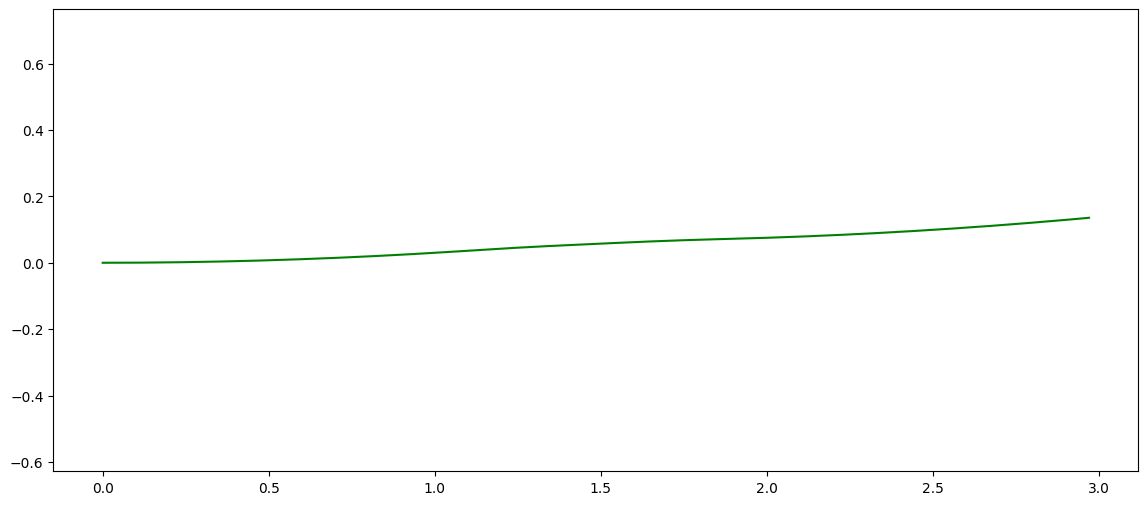

In [3]:
# define interstage (plasma-lens-based)
interstage1 = InterstageImpactX()
interstage1.nom_energy = source.energy
interstage1.beta0 = source.beta_x
interstage1.dipole_length = 1.0*np.sqrt(source.energy/10e9)
interstage1.dipole_field = 1.0
interstage1.L2_by_L1 = 1.103
interstage1.B2_by_B1 = 1
interstage1.enable_nonlinearity = True
interstage1.enable_chicane = True
interstage1.enable_sextupole = True
interstage1.enable_csr = True
interstage1.enable_isr = True

# plot the geometric layout
interstage1.plot_layout()

In [4]:
# setup linac
linac1 = Linac(source=source)
linac1.trackables = [source, interstage1]

# perform tracking
linac1.run('test_interstage1', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   5.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  2.0%, ε =  10.0/1.0 mm-mrad
    ... #1  InterstageImpactX       (s =    3.0 m) :   E =   5.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  2.0%, ε =  11.0/1.1 mm-mrad


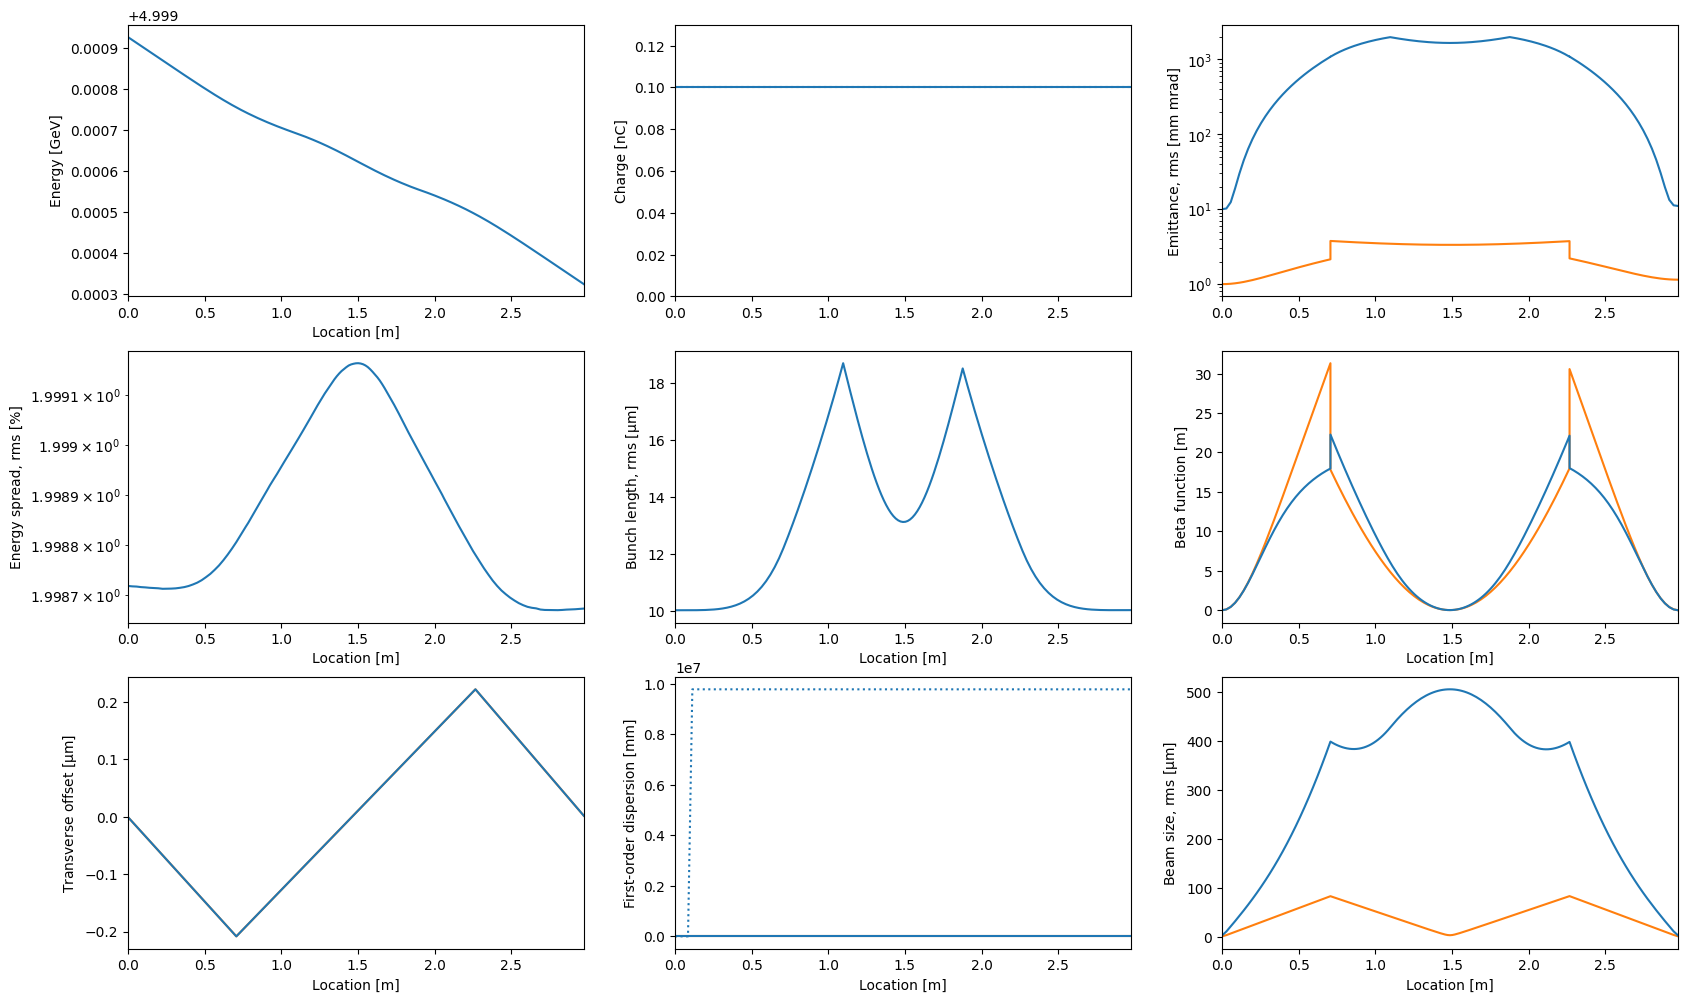

In [5]:
linac1.trackables[1].plot_evolution()

## Quadrupole-based interstage

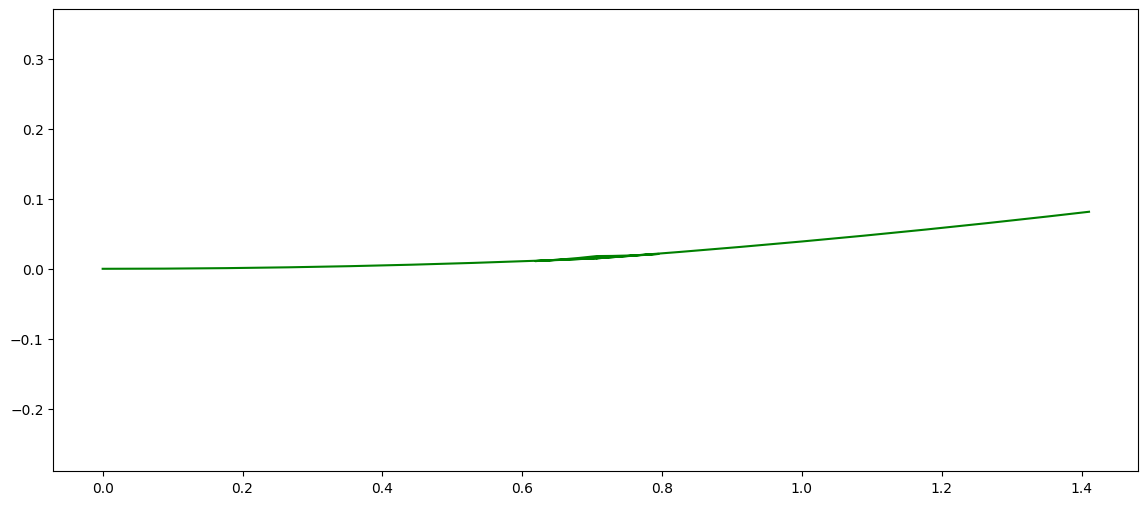

In [6]:
# define interstage
interstage2 = InterstageQuadsImpactX()
interstage2.nom_energy = source.energy
interstage2.beta0 = source.beta_x
interstage2.dipole_length = 1.0*np.sqrt(source.energy/10e9)
interstage2.dipole_field = 1.0
interstage2.enable_nonlinearity = True
interstage2.enable_chicane = True
interstage2.enable_sextupole = True
interstage2.enable_csr = True
interstage2.enable_isr = True

# perform quad and dipole matching (to set correct beta and dispersion)
interstage2.match_lattice()

# plot the geometric layout
interstage2.plot_layout()

In [7]:
# set up linac
linac2 = Linac(source=source)
linac2.trackables = [source, interstage2]

# perform simulation
linac2.run('test_interstage2', overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   5.0 GeV, Q = -0.10 nC, σz =  10.0 µm, σE =  2.0%, ε =  10.0/1.0 mm-mrad
    ... #1  InterstageQuadsImpactX  (s =    3.1 m) :   E =   5.0 GeV, Q = -0.10 nC, σz =  15.3 µm, σE =  2.0%, ε = 586.2/5.2 mm-mrad


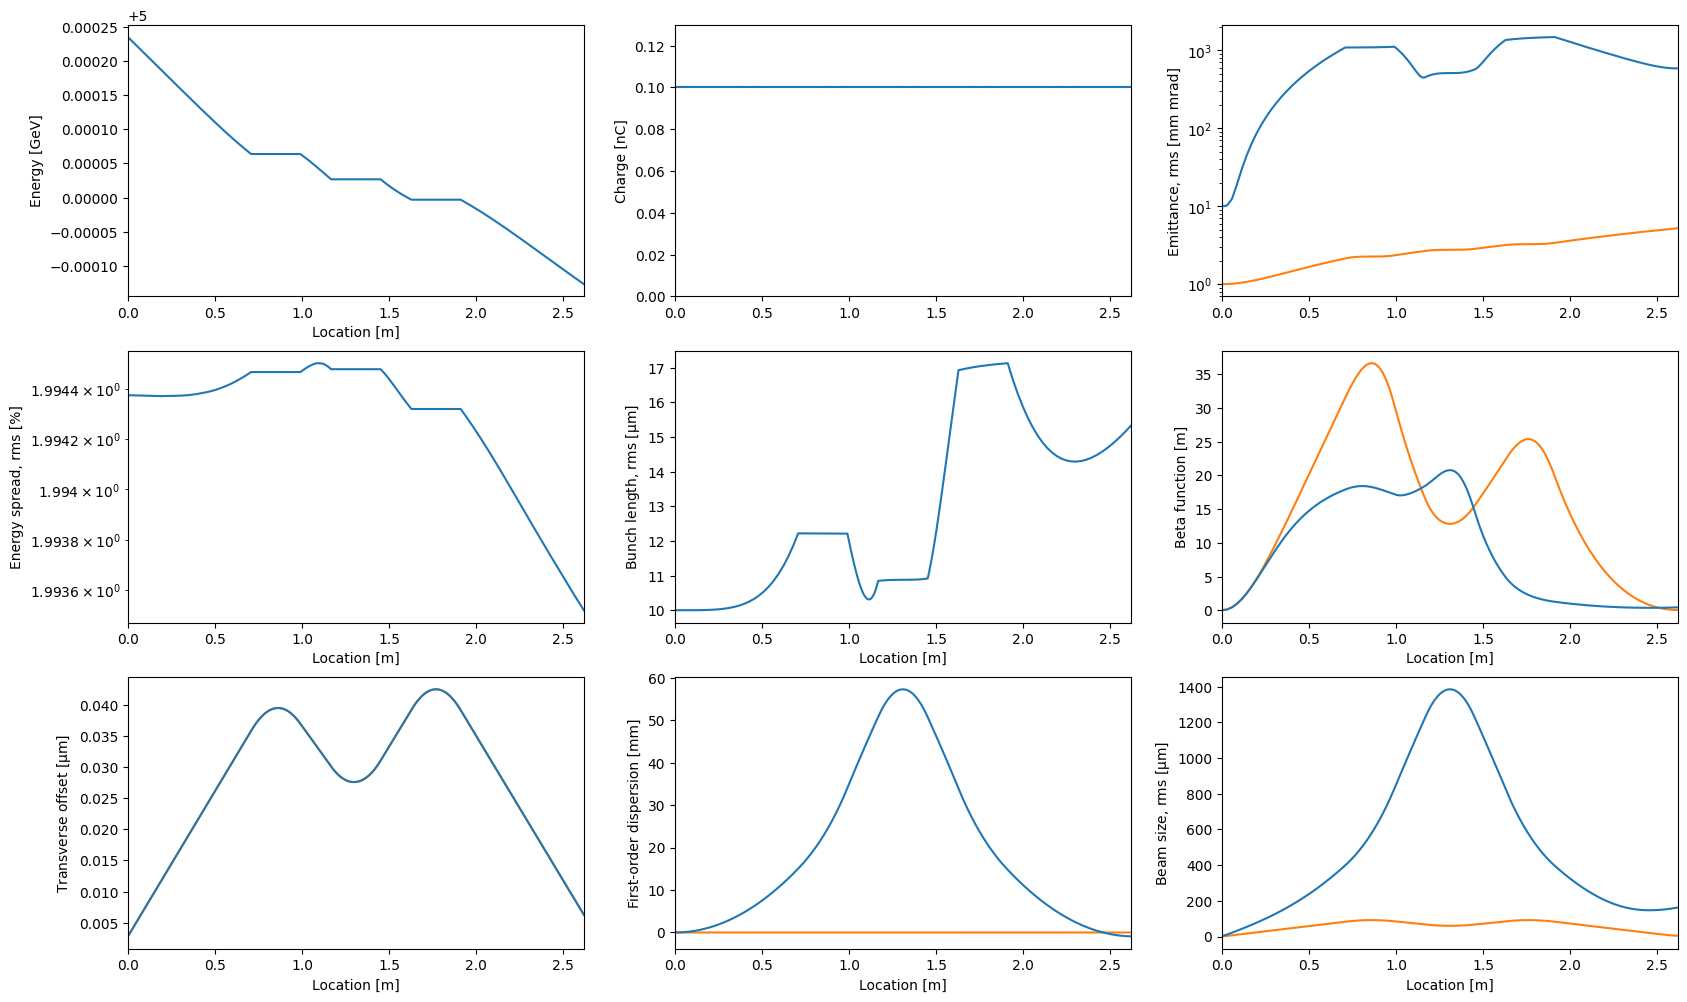

In [8]:
linac2.trackables[1].plot_evolution()